In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(X_train))
print(len(X_test))

60000
10000


In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# Function to Visualize Data from Matrix

def show_digit(mat):
    return plt.matshow(mat)

AxesImage(43.2,25.92;223.2x223.2)AxesImage(43.2,25.92;223.2x223.2)AxesImage(43.2,25.92;223.2x223.2)AxesImage(43.2,25.92;223.2x223.2)AxesImage(43.2,25.92;223.2x223.2)

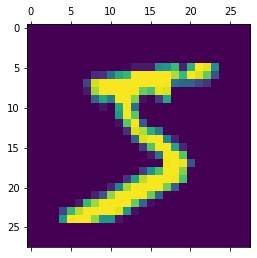

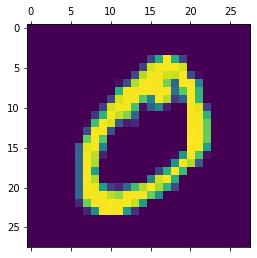

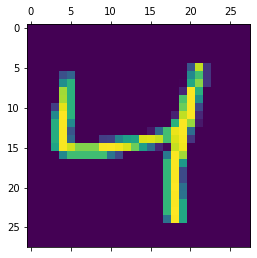

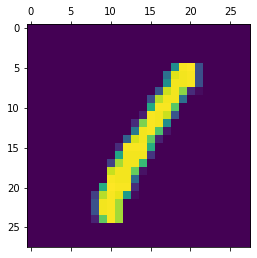

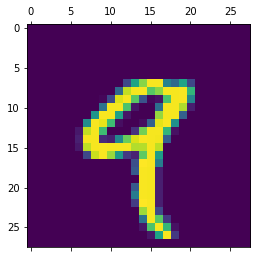

In [7]:
for i in X_train[:5]:
    print(show_digit(i), end = '')

In [8]:
# Verifying if y_train has correct labels for X_train
for i in y_train[:5]:
    print(i, end = ' ')

5 0 4 1 9 

In [9]:
# Every value in a matrix has a value upto 256 (0-255)
# Thus, we can normalize each matrix (each image), to normalize the values
# This will help in getting better predictions

In [10]:
# Normalize

X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
print(X_train[0])
print('*'*100)
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
# Flattening each (28,28) image --> (784,1) (A flatbed of the matrix values of each image)
# This will be given as input with input neurons = 784

In [13]:
# Current Shape
X_train.shape

(60000, 28, 28)

### Model 1: Manual Flattening to flatten the Input Image

In [14]:
# Manual Flattening

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
# New shape
X_train_flattened.shape

(60000, 784)

In [16]:
X_train_flattened[0].shape

(784,)

In [17]:
# Building the Model

model = Sequential([
                Dense(10, input_shape=(784,), activation='sigmoid')          # 10 Neurons in Output Layer and 784 Neurons in Input Layer
                                                                             # No Hidden Layer
                                                                             # Sigmoids are often used as Output Layer
])

In [18]:
# Compiling the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',                        # Sparse Categorical Cross Entropy is used when we have discrete classes in Y                                                  
              metrics=['accuracy'])                                          # Categorical Cross Entropy is used when we have one hot encoded values in Y

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fitting the Model with Training Data

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8745
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [20]:
# Evaluating Model Performance
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2651 - accuracy: 0.9259


[0.26512137055397034, 0.9258999824523926]

In [21]:
y_pred = model.predict(X_test_flattened)

In [22]:
y_pred[0]                            # Gives probability for each class for the given input image

array([3.7021041e-03, 2.1899988e-08, 1.4558345e-02, 9.7607893e-01,
       1.1482239e-03, 1.3208205e-01, 3.9989654e-08, 9.9985600e-01,
       8.8031083e-02, 6.4242482e-01], dtype=float32)

In [23]:
np.argmax(y_pred[0])                 # This gives the index for which the probability for the given input is maximum, 
                                     # Thus gives the Class Name or Digit

7

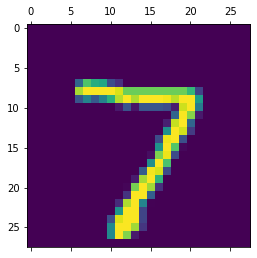

In [24]:
# Verifying if given input is same as output
show_digit(X_test[0])

In [25]:
# To find the Confusion Matrix, we want an array with predicted discrete classes
# Currently, we have y_pred in form of array of probabilities

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [27]:
# Comparing with Y true and Y predicted
print('Predicted:', str(y_pred_labels[:5]))
print('Actuals: ', str(y_test[:5]))

Predicted: [7, 2, 1, 0, 4]
Actuals:  [7 2 1 0 4]


In [49]:
#Labels for Confusion Matrix
labels = [str(i) for i in range(0,10)]

In [28]:
# Confiusion Matrix

cm = tf.math.confusion_matrix(y_test, y_pred_labels, num_classes = 10)

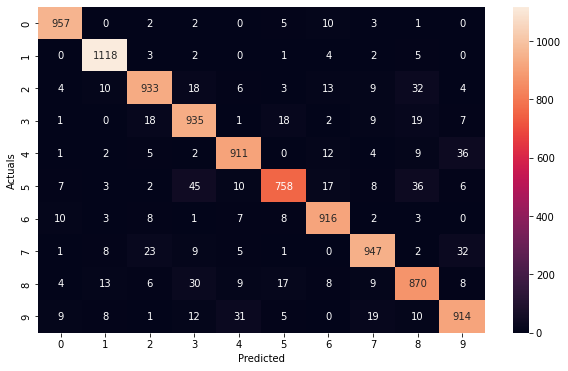

In [52]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, fmt = 'g', annot = True, xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

### Model 2: Using Flatten() from TensorFlow to flatten the Input Image

In [30]:
# Using Flatten() Layer and Building the Model

In [31]:
model2 = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(10, activation = 'sigmoid')
]
)

In [32]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4665 - accuracy: 0.8788
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [34]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.9258


[0.26473626494407654, 0.9258000254631042]

In [35]:
y_pred_2 = model2.predict(X_test)
y_pred_2_labels = [np.argmax(i) for i in y_pred_2]

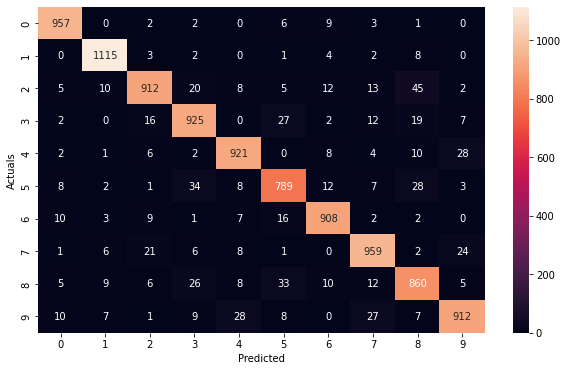

In [51]:
cm2 = tf.math.confusion_matrix(y_test, y_pred_2_labels)

plt.figure(figsize = (10,6))
sns.heatmap(cm2, fmt = 'g', annot = True, xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

### Model 3: Adding Hidden Layer with Flatten() Layer

In [37]:
# Adding a Hidden Layer

In [38]:
model3 = Sequential([
                     Flatten(input_shape = (28,28)),
                     Dense(16, activation = 'relu'),
                     Dense(10, activation = 'sigmoid')
])

In [39]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [40]:
model3.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4327 - accuracy: 0.8780
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2449 - accuracy: 0.9309
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2069 - accuracy: 0.9405
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1854 - accuracy: 0.9463
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1720 - accuracy: 0.9497
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1629 - accuracy: 0.9515
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1552 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1490 - accuracy: 0.9557
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1451 - accuracy: 0.9568
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.140

In [41]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1716 - accuracy: 0.9484


[0.1716499626636505, 0.9484000205993652]

In [42]:
y_pred_3 = model3.predict(X_test)
y_pred_3_labels = [np.argmax(i) for i in y_pred_3]

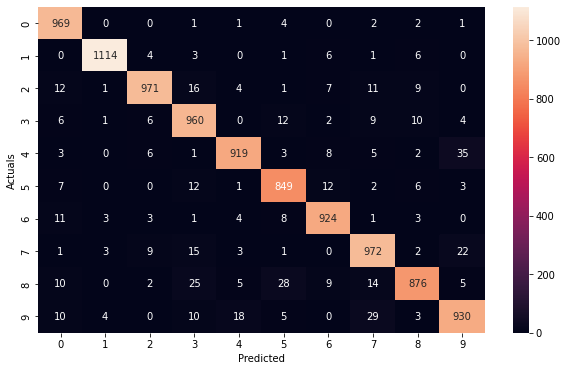

In [53]:
cm3 = tf.math.confusion_matrix(y_test, y_pred_3_labels)

plt.figure(figsize = (10,6))
sns.heatmap(cm3, fmt = 'g', annot = True, xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()